<a href="https://colab.research.google.com/github/ogiogidayo/machine-learning/blob/main/ml6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [ ]:
iris = load_iris()

iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [ ]:
import pandas as pd

df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['Species_name'] = iris.target_names[iris.target]
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species_name
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


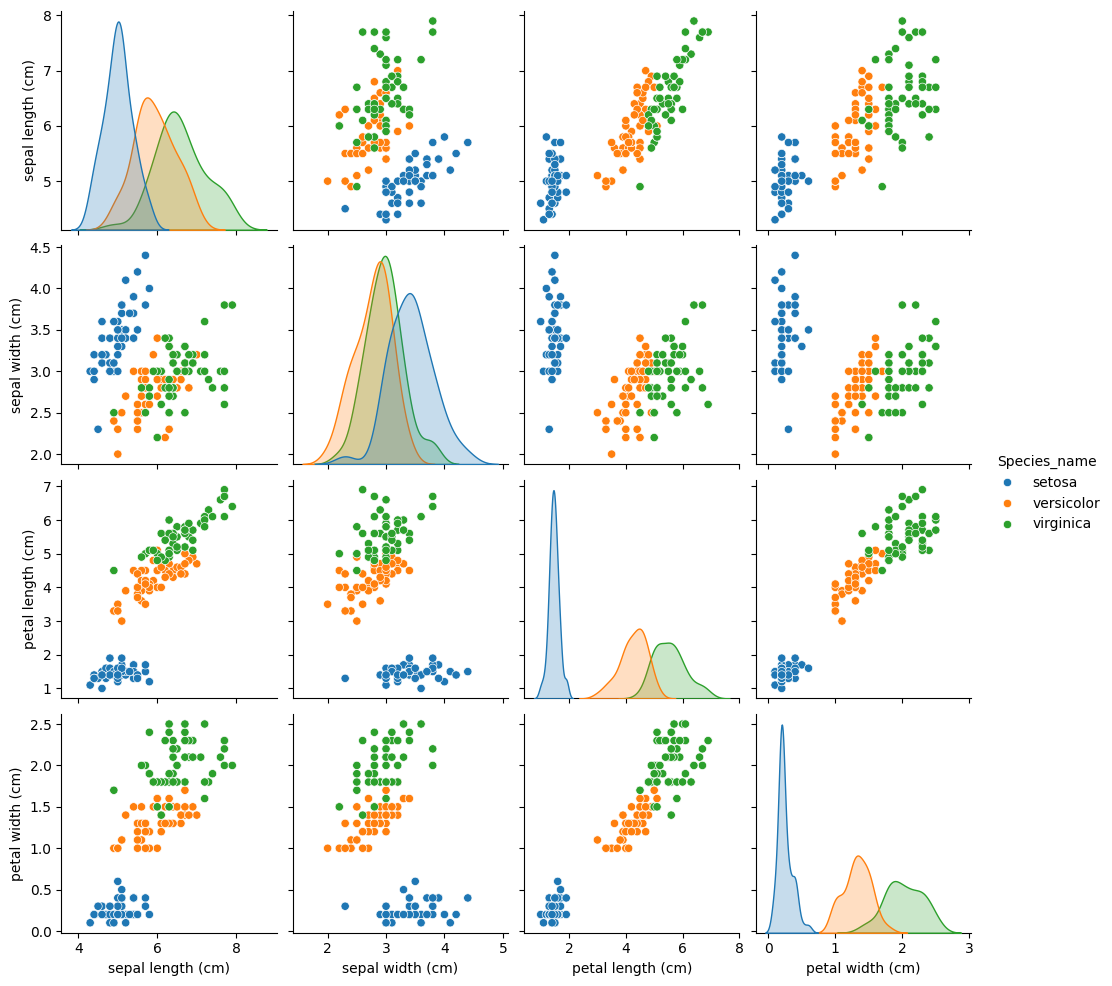

In [ ]:
import seaborn as sns

sns.pairplot(df, hue='Species_name')

In [ ]:
df['Species'] = iris.target

df = df[ (df['Species_name'] == 'setosa') | (df['Species_name'] == 'versicolor')]

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species_name,Species
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0


In [ ]:
x = df.iloc[:, [2, 3]]
y = df.iloc[:, [5]]
print(x)
print(y)

    petal length (cm)  petal width (cm)
0                 1.4               0.2
1                 1.4               0.2
2                 1.3               0.2
3                 1.5               0.2
4                 1.4               0.2
..                ...               ...
95                4.2               1.2
96                4.2               1.3
97                4.3               1.3
98                3.0               1.1
99                4.1               1.3

[100 rows x 2 columns]
    Species
0         0
1         0
2         0
3         0
4         0
..      ...
95        1
96        1
97        1
98        1
99        1

[100 rows x 1 columns]


サポートベクターマシンで学習

In [ ]:
from sklearn import svm

model = svm.LinearSVC()
model.fit(x, y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LinearSVC()

サポートベクターを可視化

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


<Axes: >

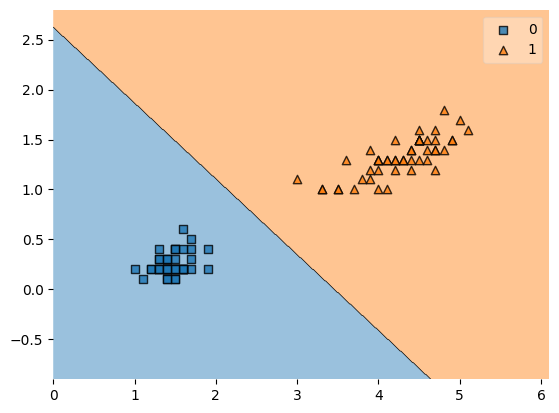

In [ ]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(np.array(x), np.squeeze(np.array(y)), clf=model)

iris datasetの4つの説明変数を用いて, 分離超平面を求める

In [ ]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(120, 4)
(120,)
(30, 4)
(30,)


線形サポートベクターマシーンで学習

In [ ]:
model = svm.LinearSVC()
model.fit(x_train, y_train)

LinearSVC()

In [ ]:
評価用データで分類精度を評価

In [ ]:
from sklearn import metrics

pred = model.predict(x_test)
print(metrics.accuracy_score(y_test, pred))

0.9666666666666667


任意の入力に対して分離

In [ ]:
pred_num = model.predict([[1.8, 1.5, 1.1, 0.2]])
print(iris.target_names[pred_num])

['versicolor']
